In [79]:
import numpy as np
from matplotlib import pylab as plt
import subprocess 

In [80]:
def calc_jaw_translation(field_size,iso,jaw_posz,jaw_height,jaw_long_x):
    cut_off_jaw=jaw_height*field_size/(2*iso)
    jaw_narrow_x=jaw_long_x-cut_off_jaw
    cone_halfwidth_at_jaw=jaw_posz*field_size/(2*iso)
    centre_of_jaw_x=(jaw_long_x+jaw_narrow_x)/4
    jaw_translation_x=cone_halfwidth_at_jaw+centre_of_jaw_x
    print(cone_halfwidth_at_jaw,centre_of_jaw_x)
    return jaw_translation_x

In [81]:
field_size=10 # cm square
iso=100 # cm from source
xjaw_posz=100-53 #cm
xjaw_height=7.8 #cm
jaw_long_x=20 #cm
calc_jaw_translation(field_size,iso,xjaw_posz,xjaw_height,jaw_long_x)

2.35 9.9025


12.2525

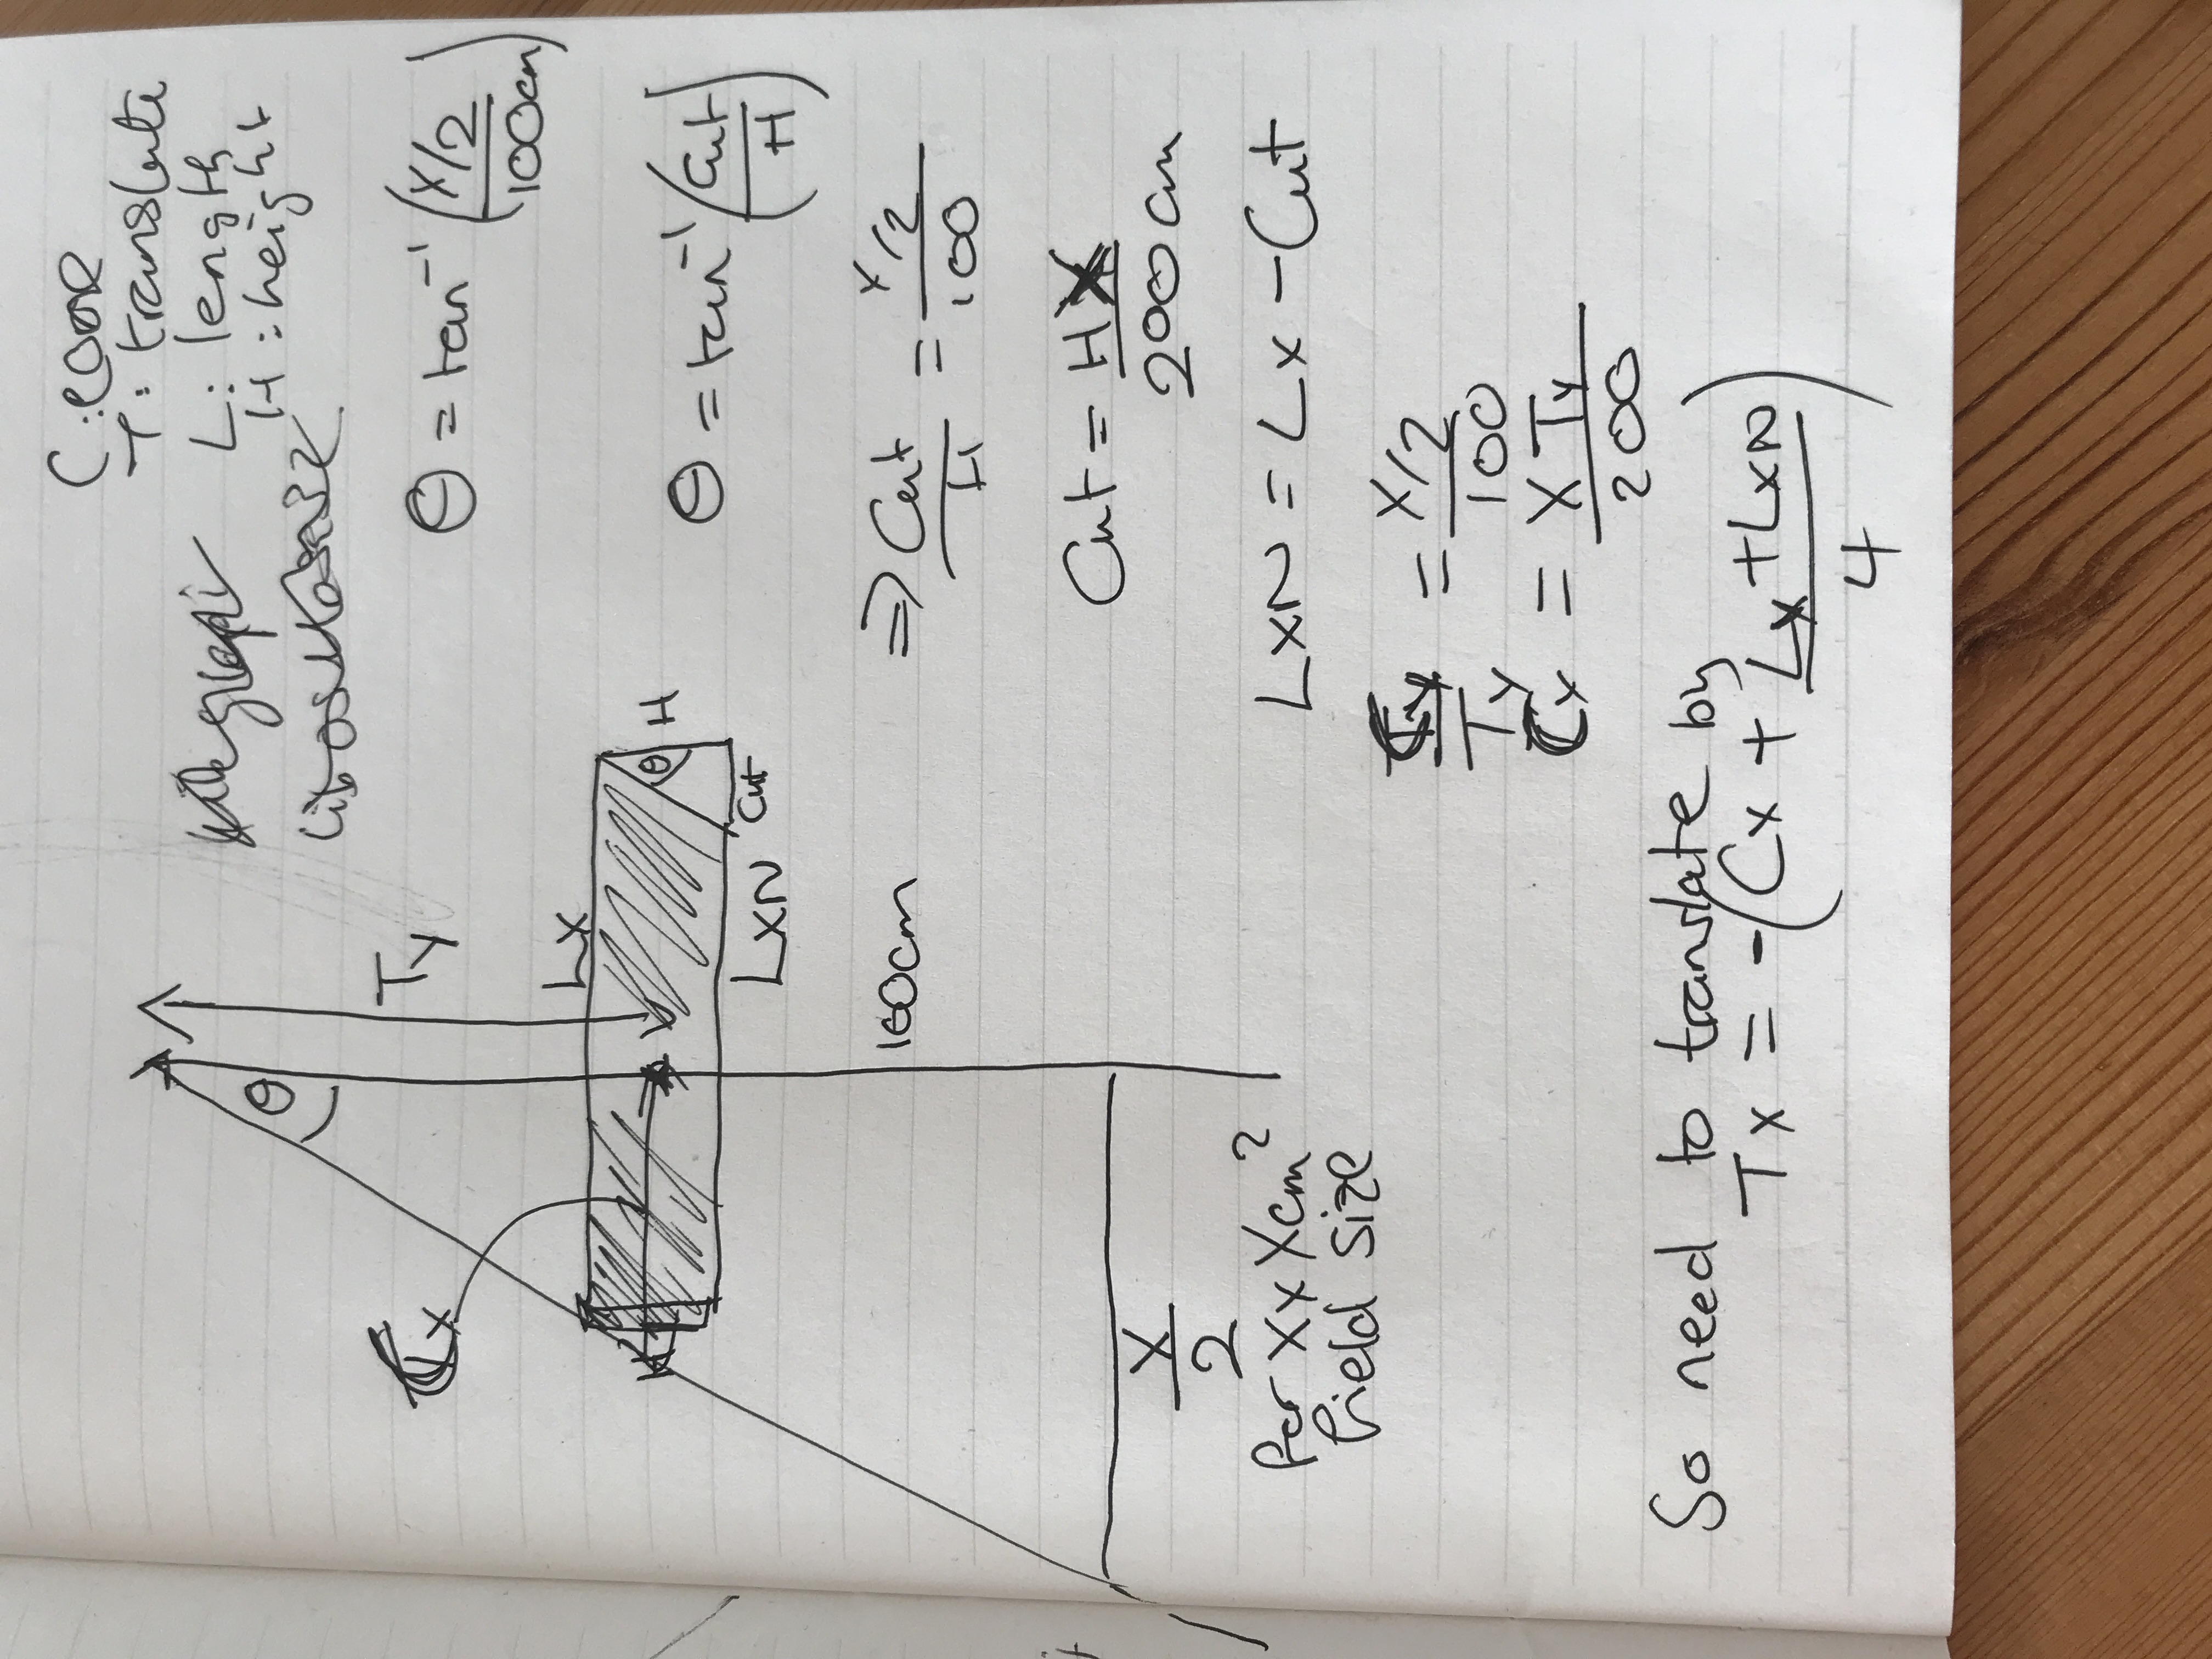JawGeo


In [82]:
field_size=10 # cm square
iso=100 # cm from source
yjaw_posz=100-58.9 #cm
yjaw_height=3 #cm
jaw_long_x=20 #cm
calc_jaw_translation(field_size,iso,yjaw_posz,yjaw_height,jaw_long_x)


2.055 9.9625


12.0175

### mlc leaves position


In [114]:
def calc_mlc_translation(field_size,iso,jaw_posz,jaw_height,jaw_long_x,jaw_short_x):
    jaw_narrow_x=jaw_short_x
    cone_halfwidth_at_jaw=jaw_posz*field_size/(2*iso)
    centre_of_jaw_x=(jaw_long_x+jaw_narrow_x)/4
    jaw_translation_x=cone_halfwidth_at_jaw+centre_of_jaw_x
    print(cone_halfwidth_at_jaw,centre_of_jaw_x)
    return jaw_translation_x

In [115]:
lengths_at_points=np.array([160.5,162,163.1,164.3,165.2,165.8,166.2,166.6,166.9,167.1,166.9,166.5,166.1,165.4,164.5,163.5])
lengths_at_points=np.flip(lengths_at_points)

In [116]:
mlc_system_pos=1000-664.5 #mm from iso
leaf_height=75 #mm
top_of_mlc_system=mlc_system_pos-(leaf_height/2)
individual_trap_height=5 #mm
points_on_leaf=np.arange(0,79,5)+top_of_mlc_system #mm
print(top_of_mlc_system,"points",points_on_leaf)
leaf_translations=np.array([])
leaf_midpoints=np.array([])
for leaf in range(0,len(points_on_leaf)-1):
    leaf_long=lengths_at_points[leaf]
    leaf_short=lengths_at_points[leaf+1]
    if leaf_short>leaf_long:
        temp=leaf_short
        leaf_short=leaf_long
        leaf_long=temp
    leaf_high=points_on_leaf[leaf]
    leaf_low=points_on_leaf[leaf+1]
    leaf_midpos_z=(leaf_high+leaf_low)/2.0
    leaf_midpoint_x=(leaf_long+leaf_short)/4.0
    translation=calc_mlc_translation(field_size,iso,leaf_midpos_z,individual_trap_height,leaf_long,leaf_short)
    print(leaf, leaf_high, leaf_low ,leaf_long, leaf_short, translation,leaf_midpoint_x)

    leaf_translations=np.append(leaf_translations,translation)
    leaf_midpoints=np.append(leaf_midpoints,leaf_midpoint_x)
    
print(leaf_translations)
translation_of_choice=0
trap_of_choice=0
if leaf_translations.mean()>0:
    translation_of_choice=leaf_translations.max()
    trap_of_choice=leaf_translations.argmax()
    
else: 
    translation_of_choice=leaf_translations.min()
    trap_of_choice=leaf_translations.argmin()

print(translation_of_choice, trap_of_choice)


298.0 points [298. 303. 308. 313. 318. 323. 328. 333. 338. 343. 348. 353. 358. 363.
 368. 373.]
15.025 82.0
0 298.0 303.0 164.5 163.5 97.025 82.0
15.275 82.475
1 303.0 308.0 165.4 164.5 97.75 82.475
15.525 82.875
2 308.0 313.0 166.1 165.4 98.4 82.875
15.775 83.15
3 313.0 318.0 166.5 166.1 98.92500000000001 83.15
16.025 83.35
4 318.0 323.0 166.9 166.5 99.375 83.35
16.275 83.5
5 323.0 328.0 167.1 166.9 99.775 83.5
16.525 83.5
6 328.0 333.0 167.1 166.9 100.025 83.5
16.775 83.375
7 333.0 338.0 166.9 166.6 100.15 83.375
17.025 83.19999999999999
8 338.0 343.0 166.6 166.2 100.225 83.19999999999999
17.275 83.0
9 343.0 348.0 166.2 165.8 100.275 83.0
17.525 82.75
10 348.0 353.0 165.8 165.2 100.275 82.75
17.775 82.375
11 353.0 358.0 165.2 164.3 100.15 82.375
18.025 81.85
12 358.0 363.0 164.3 163.1 99.875 81.85
18.275 81.275
13 363.0 368.0 163.1 162.0 99.55000000000001 81.275
18.525 80.625
14 368.0 373.0 162.0 160.5 99.15 80.625
[ 97.025  97.75   98.4    98.925  99.375  99.775 100.025 100.15  100.

In [123]:
print(leaf_midpoints)
print("trap_of_choice", trap_of_choice)
print(translation_of_choice,leaf_midpoints[trap_of_choice])
base_translation=abs(translation_of_choice)-abs(leaf_midpoints[trap_of_choice])
print("")
print("base",base_translation)
chosen_midpoint=leaf_midpoints[trap_of_choice]
shifts=leaf_midpoints-chosen_midpoint
print("shifts",shifts)
all_translation=200-leaf_midpoints-base_translation+2*shifts
print(all_translation)

[82.    82.475 82.875 83.15  83.35  83.5   83.5   83.375 83.2   83.
 82.75  82.375 81.85  81.275 80.625]
trap_of_choice 9
100.275 83.0

base 17.275000000000006
shifts [-1.    -0.525 -0.125  0.15   0.35   0.5    0.5    0.375  0.2    0.
 -0.25  -0.625 -1.15  -1.725 -2.375]
[ 98.725  99.2    99.6    99.875 100.075 100.225 100.225 100.1    99.925
  99.725  99.475  99.1    98.575  98.     97.35 ]


In [124]:
narrow_x0=1
wide_x0=1
half_length_x0=1
total_string=""
for ij in range(0,len(points_on_leaf)-1):
    mlc_string="mlc_y"+str(ij)
    if lengths_at_points[ij]<lengths_at_points[ij+1]:
        narrow_x=lengths_at_points[ij]
        wide_x=lengths_at_points[ij+1]
    else:
        wide_x=lengths_at_points[ij+1]
        narrow_x=lengths_at_points[ij]
        
    if ij==0:
        narrow_x0=narrow_x
        wide_x0=wide_x
        half_length_x0=wide_x0+narrow_x0/2
        
    half_length_x=(wide_x+narrow_x)/4
    
    translation_x=all_translation[ij]
    translation_z=30-ij*5
    stringthing="/gate/mlc_leaf/daughters/name                      "+mlc_string+" \n"+\
    "/gate/mlc_leaf/daughters/insert                      wedge \n"+\
    "/gate/"+mlc_string+"/setMaterial                  Tungsten \n"+\
    "/gate/"+mlc_string+"/geometry/setNarrowerXLength  "+str(narrow_x)+" mm \n"+\
    "/gate/"+mlc_string+"/geometry/setXLength          "+str(wide_x)+" mm  \n"+\
    "/gate/"+mlc_string+"/geometry/setYLength          5 mm \n"+\
    "/gate/"+mlc_string+"/geometry/setZLength          3 mm \n"+\
    "/gate/"+mlc_string+"/placement/setTranslation     "+str(translation_x)+" 0 "+str(translation_z)+" mm \n"+\
    "/gate/"+mlc_string+"/placement/setRotationAxis    1 0 0  \n"+\
    "/gate/"+mlc_string+"/placement/setRotationAngle   90 deg \n"+\
    "/gate/"+mlc_string+"/vis/setVisible               1 \n"+\
    "/gate/"+mlc_string+"/vis/setColor                 magenta \n"
    total_string=total_string+stringthing
print(total_string)
subprocess.run("pbcopy", universal_newlines=True, input=total_string)

/gate/mlc_leaf/daughters/name                      mlc_y0 
/gate/mlc_leaf/daughters/insert                      wedge 
/gate/mlc_y0/setMaterial                  Tungsten 
/gate/mlc_y0/geometry/setNarrowerXLength  163.5 mm 
/gate/mlc_y0/geometry/setXLength          164.5 mm  
/gate/mlc_y0/geometry/setYLength          5 mm 
/gate/mlc_y0/geometry/setZLength          3 mm 
/gate/mlc_y0/placement/setTranslation     98.725 0 30 mm 
/gate/mlc_y0/placement/setRotationAxis    1 0 0  
/gate/mlc_y0/placement/setRotationAngle   90 deg 
/gate/mlc_y0/vis/setVisible               1 
/gate/mlc_y0/vis/setColor                 magenta 
/gate/mlc_leaf/daughters/name                      mlc_y1 
/gate/mlc_leaf/daughters/insert                      wedge 
/gate/mlc_y1/setMaterial                  Tungsten 
/gate/mlc_y1/geometry/setNarrowerXLength  164.5 mm 
/gate/mlc_y1/geometry/setXLength          165.4 mm  
/gate/mlc_y1/geometry/setYLength          5 mm 
/gate/mlc_y1/geometry/setZLength          3 mm 
/g

CompletedProcess(args='pbcopy', returncode=0)

In [107]:
distance_for_scattering=6
lengths_at_points2=lengths_at_points-distance_for_scattering
#for making kill volumes inside leaf
narrow_x0=1
wide_x0=1
half_length_x0=1
total_string=""
kill_string="/gate/actor/addActor   KillActor                         MyActor \n"+\
"/gate/actor/MyActor/save                                 MyOutputFile.txt \n"+\
"/gate/actor/MyActor/attachTo                             mlc_leaf \n"+\
"/gate/actor/MyActor/addFilter                            volumeFilter \n"
for ij in range(0,len(points_on_leaf)-1):
    mlc_string="mlc_y"+str(ij)
    mlc_string_kill="mlc_y"+str(ij)+"_kill"
    if lengths_at_points[ij]<lengths_at_points2[ij+1]:
        narrow_x=lengths_at_points2[ij]
        wide_x=lengths_at_points2[ij+1]
    else:
        wide_x=lengths_at_points2[ij+1]
        narrow_x=lengths_at_points2[ij]
        
    if ij==0:
        narrow_x0=narrow_x
        wide_x0=wide_x
        half_length_x0=wide_x0+narrow_x0/2
        
    half_length_x=(wide_x+narrow_x)/4
    
    translation_x=-int(distance_for_scattering/2)
    translation_z=0
    stringthing="/gate/"+mlc_string+"/daughters/name                      "+mlc_string_kill+" \n"+\
    "/gate/"+mlc_string+"/daughters/insert                      wedge \n"+\
    "/gate/"+mlc_string_kill+"/setMaterial                  Tungsten \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setNarrowerXLength  "+str(narrow_x)+" mm \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setXLength          "+str(wide_x)+" mm  \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setYLength          5 mm \n"+\
    "/gate/"+mlc_string_kill+"/geometry/setZLength          3 mm \n"+\
    "/gate/"+mlc_string_kill+"/placement/setTranslation     "+str(translation_x)+" 0 "+str(translation_z)+" mm \n"+\
    "/gate/"+mlc_string_kill+"/vis/setVisible               1 \n"+\
    "/gate/"+mlc_string_kill+"/vis/setColor                 white \n"
    total_string=total_string+stringthing
    stringthingkill="/gate/actor/MyActor/volumeFilter/addVolume "+mlc_string+"\n"
    kill_string=kill_string+stringthingkill
print(total_string)

subprocess.run("pbcopy", universal_newlines=True, input=total_string)

/gate/mlc_y0/daughters/name                      mlc_y0_kill 
/gate/mlc_y0/daughters/insert                      wedge 
/gate/mlc_y0_kill/setMaterial                  Tungsten 
/gate/mlc_y0_kill/geometry/setNarrowerXLength  157.5 mm 
/gate/mlc_y0_kill/geometry/setXLength          158.5 mm  
/gate/mlc_y0_kill/geometry/setYLength          5 mm 
/gate/mlc_y0_kill/geometry/setZLength          3 mm 
/gate/mlc_y0_kill/placement/setTranslation     -3 0 0 mm 
/gate/mlc_y0_kill/vis/setVisible               1 
/gate/mlc_y0_kill/vis/setColor                 white 
/gate/mlc_y1/daughters/name                      mlc_y1_kill 
/gate/mlc_y1/daughters/insert                      wedge 
/gate/mlc_y1_kill/setMaterial                  Tungsten 
/gate/mlc_y1_kill/geometry/setNarrowerXLength  158.5 mm 
/gate/mlc_y1_kill/geometry/setXLength          159.4 mm  
/gate/mlc_y1_kill/geometry/setYLength          5 mm 
/gate/mlc_y1_kill/geometry/setZLength          3 mm 
/gate/mlc_y1_kill/placement/setTranslation

CompletedProcess(args='pbcopy', returncode=0)